In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
a=pd.read_csv('train-2.csv')
a

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,None,NaN,Clear,181,None,1.09,804.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,21:49,3:31,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,22:50,11:48,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2:33,11:21,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,13:25,19:37,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


In [3]:
a['Number_of_Stops'].value_counts()

1    22287
0    20157
3     2556
Name: Number_of_Stops, dtype: int64

# Defination of the data

    Flight_ID: A unique identifier for each flight in the dataset. -->

    Airline: The name of the airline operating the flight.

    Departure_City: The city from which the flight is departing.

    Arrival_City: The city to which the flight is arriving.

    Distance: The distance, typically in miles or kilometers, between the departure and arrival cities.

    Departure_Time: The time at which the flight is scheduled to depart.

    Arrival_Time: The time at which the flight is scheduled to arrive at its destination.

    Duration: The total duration of the flight, typically in hours and minutes.

    Aircraft_Type: The type or model of the aircraft used for the flight.

    Number_of_Stops: The number of stops or layovers during the flight (0 indicates a non-stop flight).

    Day_of_Week: The day of the week on which the flight is scheduled.

    Month_of_Travel: The month in which the flight is scheduled.

    Holiday_Season: Indicates whether the flight falls within a holiday season or period.

    Demand: A measure of the demand or popularity of the flight.

    Weather_Conditions: The prevailing weather conditions at the time of the flight (e.g., Rain).

    Passenger_Count: The number of passengers on the flight.

    Promotion_Type: The type of promotion or special offer associated with the flight.

    Fuel_Price: The price of fuel at the time of the flight.

    Flight_Price: The price of the flight or its ticket.

In [4]:
data=a.copy()
data


,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,None,NaN,Clear,181,None,1.09,804.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,21:49,3:31,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,22:50,11:48,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2:33,11:21,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,13:25,19:37,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


# Display the first few rows

In [5]:
data.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,None,NaN,Clear,181,None,1.09,804.35


#  Display the last few rows

In [6]:
data.tail()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,21:49,3:31,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,22:50,11:48,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2:33,11:21,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,13:25,19:37,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67
44999,F45000,Airline B,Harrisport,Chelsealand,4890.0,3:37,11:19,7.70,Airbus A320,0,Monday,December,Winter,Low,Rain,91,None,0.95,532.92


#  Check for duplicated rows

In [7]:
duplicates = data[data.duplicated()]
duplicates

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price


In [8]:
data.isnull().sum()

Flight_ID                0
Airline               3573
Departure_City         340
Arrival_City           186
Distance                91
Departure_Time           0
Arrival_Time             0
Duration                 0
Aircraft_Type           43
Number_of_Stops          0
Day_of_Week            225
Month_of_Travel        267
Holiday_Season           0
Demand                 317
Weather_Conditions     302
Passenger_Count          0
Promotion_Type         403
Fuel_Price              90
Flight_Price             0
dtype: int64

# A common threshold is to keep imputed data below 5-10% of the total dataset

Percentage of Missing Values=Total Number of Data PointsNumber of Missing Values​×100

Here's the percentage of missing values for each column based on your provided dataset with an overall data count of 45,000:

    Flight_ID: 0% missing
    Airline: 7.94% missing
    Departure_City: 0.75% missing
    Arrival_City: 0.41% missing
    Distance: 0.20% missing
    Departure_Time: 0% missing
    Arrival_Time: 0% missing
    Duration: 0% missing
    Aircraft_Type: 0.09% missing
    Number_of_Stops: 0% missing
    Day_of_Week: 0.50% missing
    Month_of_Travel: 0.59% missing
    Holiday_Season: 0% missing
    Demand: 0.70% missing
    Weather_Conditions: 0.67% missing
    Passenger_Count: 0% missing
    Promotion_Type: 0.90% missing
    Fuel_Price: 0.20% missing
    Flight_Price: 0% missing



#  Handle missing data

In [9]:
data['Airline'].fillna(data['Airline'].mode()[0], inplace=True)


In [10]:
data['Aircraft_Type'].fillna(data['Aircraft_Type'].mode()[0], inplace=True)


In [11]:
data['Distance'].fillna(data['Distance'].median(),inplace=True)

In [12]:
data['Day_of_Week'].fillna(data['Day_of_Week'].mode()[0], inplace=True)


In [13]:
data['Month_of_Travel'].fillna(data['Month_of_Travel'].mode()[0], inplace=True)


In [14]:
data['Demand'].fillna(data['Demand'].mode()[0], inplace=True)


In [15]:
data['Promotion_Type'].fillna(data['Promotion_Type'].mode()[0], inplace=True)


In [16]:
data['Weather_Conditions'].fillna(data['Weather_Conditions'].mode()[0], inplace=True)


In [17]:
data['Fuel_Price'].fillna(data['Fuel_Price'].median(),inplace=True)

In [18]:
# Remove rows with missing values in "Departure_City" and "Arrival_City" columns
data.dropna(subset=["Departure_City", "Arrival_City"], inplace=True)


#  unique value counts

In [19]:
data['Aircraft_Type'].value_counts()

Airbus A320    9037
Boeing 777     8967
Airbus A380    8849
Boeing 787     8831
Boeing 737     8792
Name: Aircraft_Type, dtype: int64

In [20]:
data['Day_of_Week'].value_counts()

Sunday       6615
Friday       6346
Monday       6339
Saturday     6336
Wednesday    6324
Tuesday      6267
Thursday     6249
Name: Day_of_Week, dtype: int64

In [21]:
data['Demand'].value_counts()

Low       28930
Medium     8852
High       6694
Name: Demand, dtype: int64

In [22]:
data['Weather_Conditions'].value_counts()

Cloudy    11542
Snow      11035
Rain      10972
Clear     10927
Name: Weather_Conditions, dtype: int64

In [23]:
data['Promotion_Type'].value_counts()

Special Offer    15118
Discount         14709
None             14649
Name: Promotion_Type, dtype: int64

In [24]:
data['Flight_ID'].value_counts()

F2        1
F30025    1
F30017    1
F30018    1
F30019    1
         ..
F15042    1
F15043    1
F15044    1
F15045    1
F45000    1
Name: Flight_ID, Length: 44476, dtype: int64

In [25]:
data.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

# Drop unwanted columns

In [26]:

# Assuming you have your data in a DataFrame called 'df'
data.drop(['Flight_ID', 'Departure_Time', 'Arrival_Time'], axis=1, inplace=True)

# Now, your DataFrame 'df' will no longer contain the 'Flight_ID', 'Departure_Time', and 'Arrival_Time' columns.


# Data types

In [27]:
data.dtypes

Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
Flight_Price          float64
dtype: object

In [28]:
data

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35
5,Airline B,Lake Steveville,East Patriciafurt,6254.0,8.43,Airbus A320,0,Tuesday,December,None,Low,Snow,267,None,1.15,596.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


In [29]:
data.isnull().sum()

Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

# Treating outliers

In [30]:
data.describe()

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000,44476.000000
mean,5483.737409,7.853526,0.666045,174.903004,0.850154,574.634206
std,2591.435958,3.291677,0.750653,72.371197,0.201595,160.132024
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3239.000000,5.040000,0.000000,112.000000,0.680000,455.502500
50%,5476.000000,7.840000,1.000000,175.000000,0.850000,565.795000
75%,7721.250000,10.650000,1.000000,238.000000,1.020000,679.587500
max,10000.000000,14.450000,3.000000,300.000000,1.200000,1261.640000


In [31]:
data['Distance'] = pd.to_numeric(data['Distance'], errors='coerce')
q3 = data.Distance.quantile(0.75)
q1 = data.Distance.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(14444.625, -3484.375)

In [32]:
data['Distance'] = data['Distance'].clip(upper_tres,lower_tres)

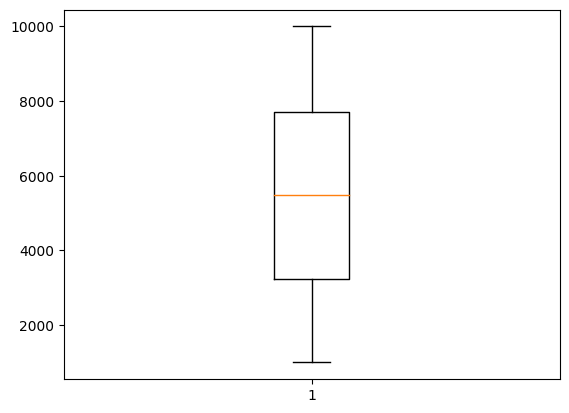

In [33]:
# Creating plot
plt.boxplot(data['Distance'])
 
# show plot
plt.show()

In [34]:
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
q3 = data.Duration.quantile(0.75)
q1 = data.Duration.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(19.065, -3.375000000000001)

In [35]:
data['Duration'] = data['Duration'].clip(upper_tres,lower_tres)

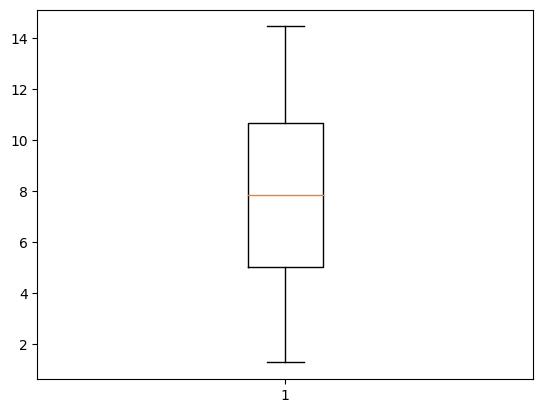

In [36]:
# Creating plot
plt.boxplot(data['Duration'])
 
# show plot
plt.show()

In [37]:
data['Number_of_Stops'] = pd.to_numeric(data['Number_of_Stops'], errors='coerce')
q3 = data.Number_of_Stops.quantile(0.75)
q1 = data.Number_of_Stops.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(2.5, -1.5)

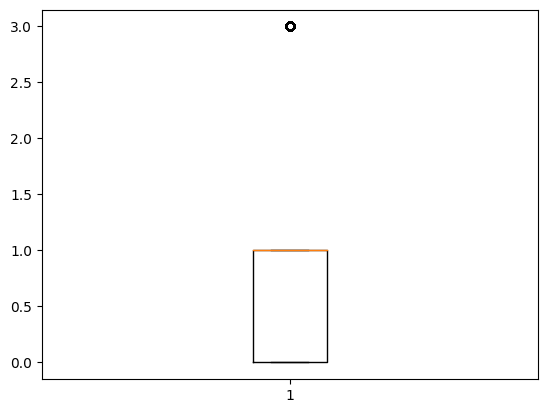

In [38]:
# Creating plot
plt.boxplot(data['Number_of_Stops'] )
 
# show plot
plt.show()

In [39]:
# data['Number_of_Stops'] = data['Number_of_Stops'].clip(upper_tres,lower_tres)

In [40]:
data['Passenger_Count'] = pd.to_numeric(data['Passenger_Count'], errors='coerce')
q3 = data.Passenger_Count.quantile(0.75)
q1 = data.Passenger_Count.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(427.0, -77.0)

In [41]:
data['Passenger_Count'] = data['Passenger_Count'].clip(upper_tres,lower_tres)

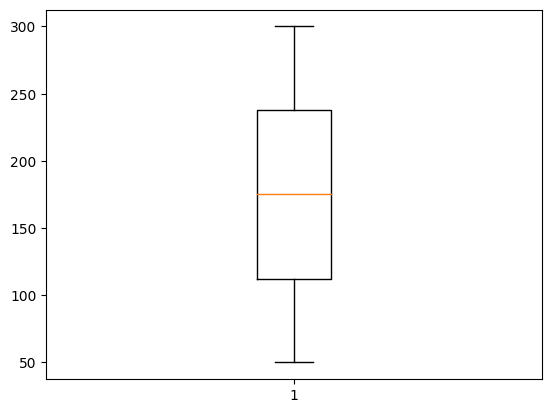

In [42]:
# Creating plot
plt.boxplot(data['Passenger_Count'] )
 
# show plot
plt.show()

In [43]:
data['Fuel_Price'] = pd.to_numeric(data['Fuel_Price'], errors='coerce')
q3 = data.Fuel_Price.quantile(0.75)
q1 = data.Fuel_Price.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(1.53, 0.17000000000000004)

In [44]:
data['Fuel_Price'] = data['Fuel_Price'].clip(upper_tres,lower_tres)

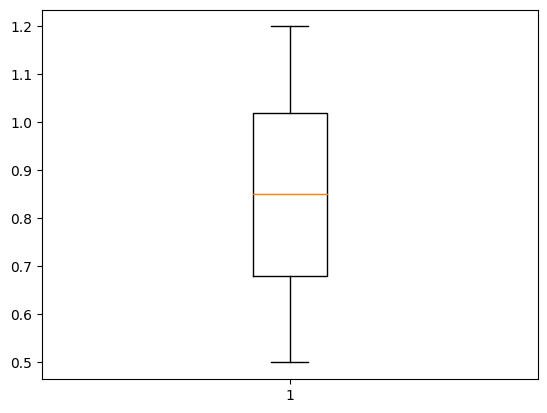

In [45]:
# Creating plot
plt.boxplot(data['Fuel_Price'] )
 
# show plot
plt.show()

In [46]:
data['Flight_Price'] = pd.to_numeric(data['Flight_Price'], errors='coerce')
q3 = data.Flight_Price.quantile(0.75)
q1 = data.Flight_Price.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(1015.7150000000003, 119.37499999999983)

In [47]:
data['Flight_Price'] = data['Flight_Price'].clip(upper_tres,lower_tres)

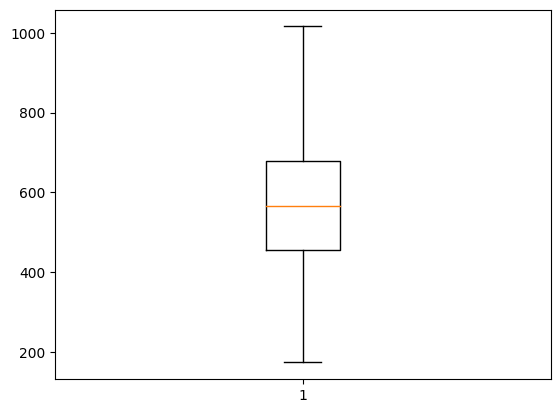

In [48]:
# Creating plot
plt.boxplot(data['Flight_Price'] )
 
# show plot
plt.show()

# EDA

In [49]:
data

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35
5,Airline B,Lake Steveville,East Patriciafurt,6254.0,8.43,Airbus A320,0,Tuesday,December,None,Low,Snow,267,None,1.15,596.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


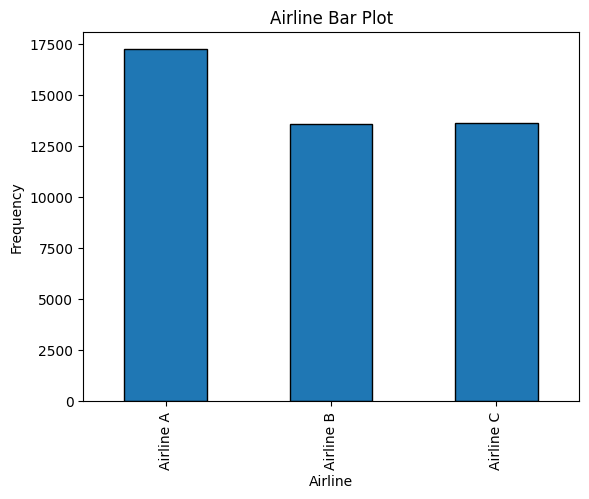

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Airline'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Airline Bar Plot')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.show()


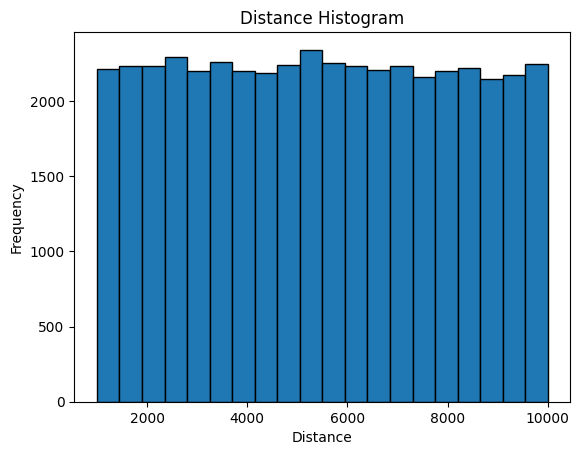

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Distance'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('Distance Histogram')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()


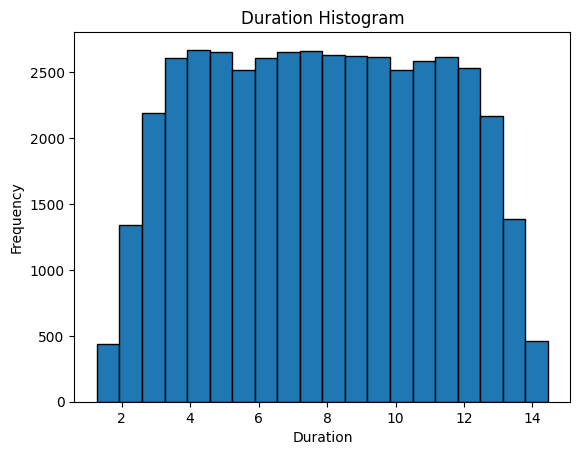

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Duration'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('Duration Histogram')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


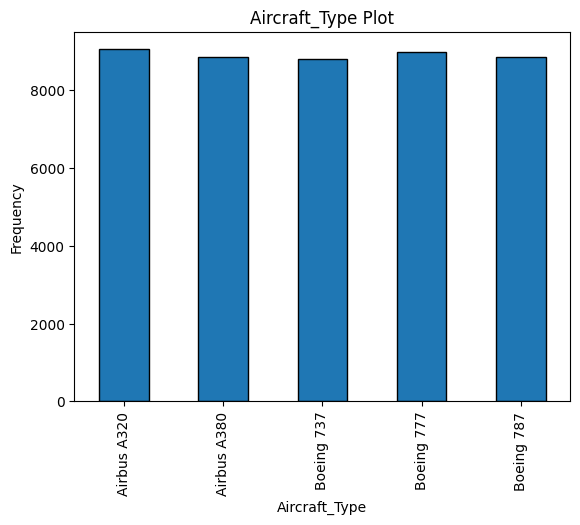

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Aircraft_Type'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Aircraft_Type Plot')
plt.xlabel('Aircraft_Type')
plt.ylabel('Frequency')
plt.show()


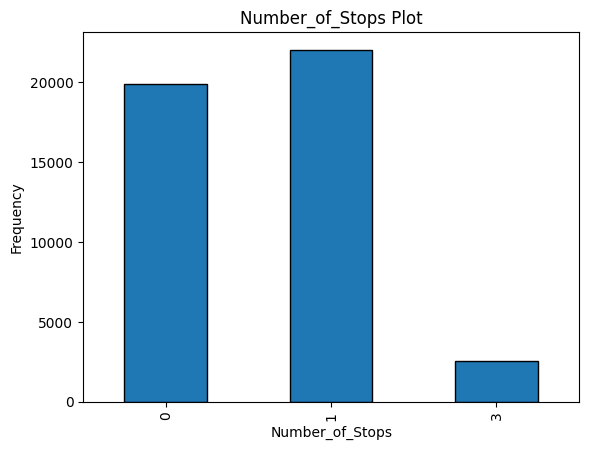

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Number_of_Stops'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Number_of_Stops Plot')
plt.xlabel('Number_of_Stops')
plt.ylabel('Frequency')
plt.show()


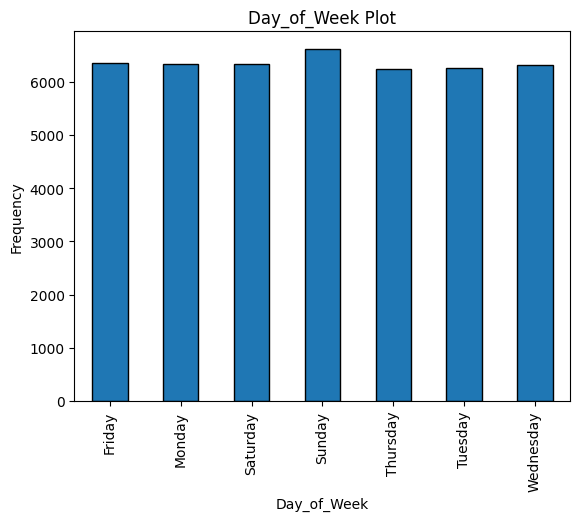

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Day_of_Week'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Day_of_Week Plot')
plt.xlabel('Day_of_Week')
plt.ylabel('Frequency')
plt.show()


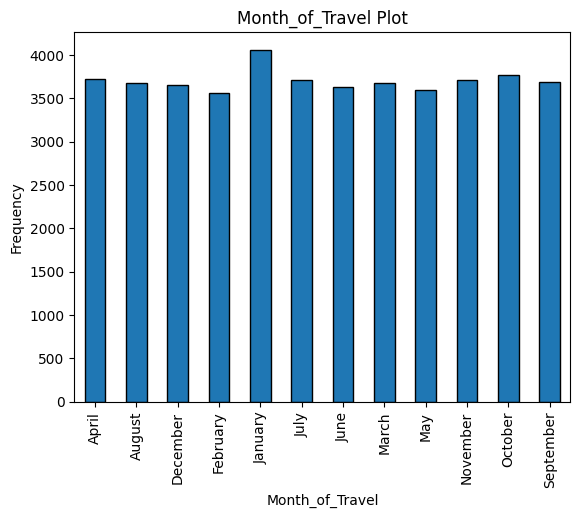

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Month_of_Travel'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Month_of_Travel Plot')
plt.xlabel('Month_of_Travel')
plt.ylabel('Frequency')
plt.show()


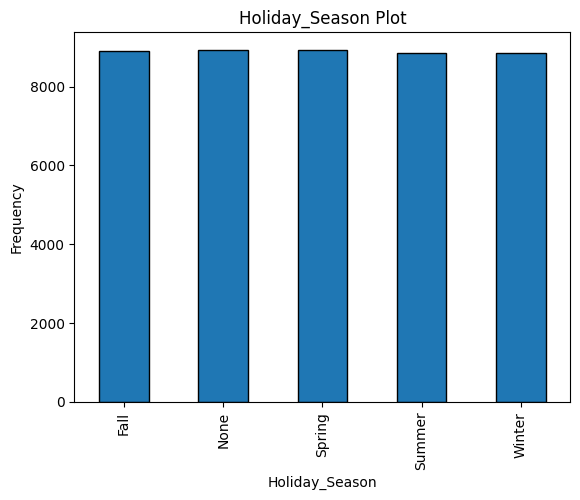

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Holiday_Season'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Holiday_Season Plot')
plt.xlabel('Holiday_Season')
plt.ylabel('Frequency')
plt.show()


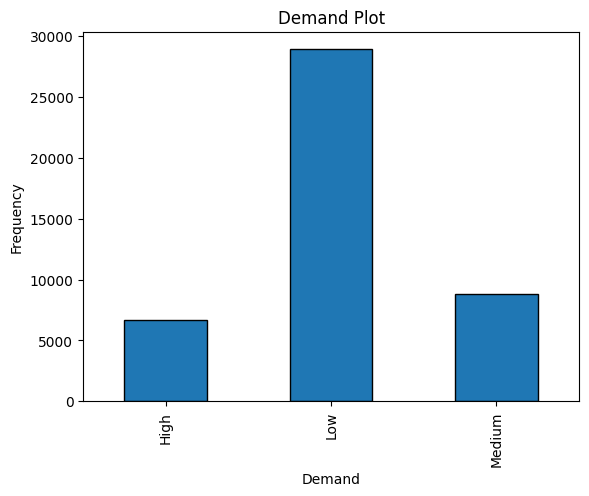

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Demand'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Demand Plot')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.show()


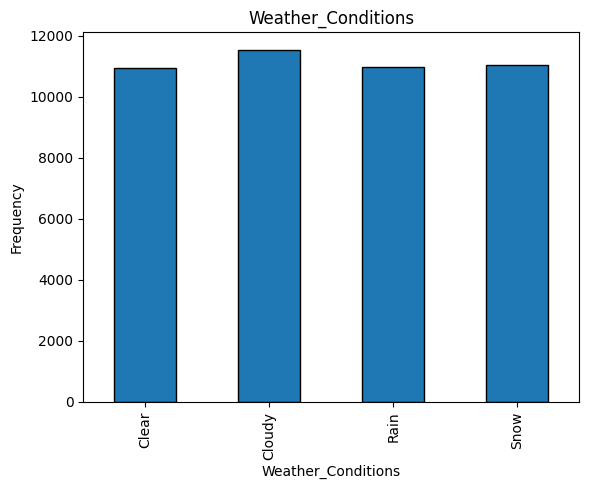

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Weather_Conditions'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Weather_Conditions')
plt.xlabel('Weather_Conditions')
plt.ylabel('Frequency')
plt.show()


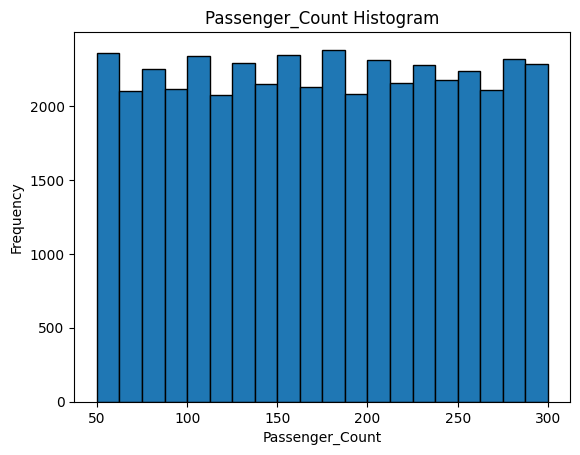

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Passenger_Count'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('Passenger_Count Histogram')
plt.xlabel('Passenger_Count')
plt.ylabel('Frequency')
plt.show()


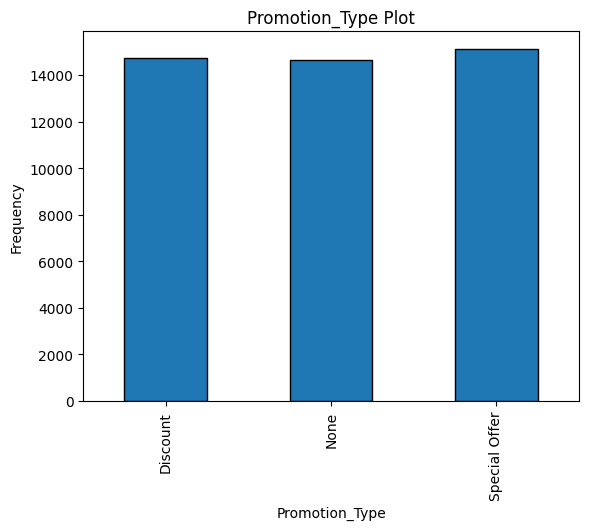

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Promotion_Type'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Promotion_Type Plot')
plt.xlabel('Promotion_Type')
plt.ylabel('Frequency')
plt.show()


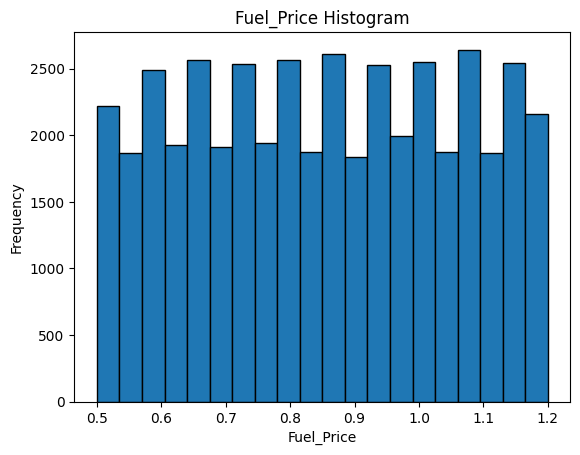

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Fuel_Price'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('Fuel_Price Histogram')
plt.xlabel('Fuel_Price')
plt.ylabel('Frequency')
plt.show()


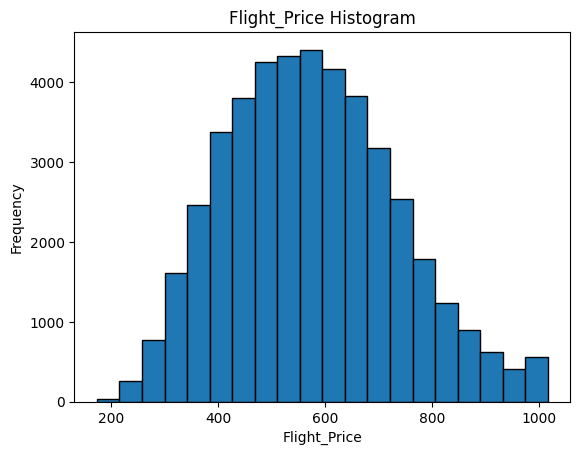

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Flight_Price'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('Flight_Price Histogram')
plt.xlabel('Flight_Price')
plt.ylabel('Frequency')
plt.show()


# Features vs target

In [64]:
data

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35
5,Airline B,Lake Steveville,East Patriciafurt,6254.0,8.43,Airbus A320,0,Tuesday,December,None,Low,Snow,267,None,1.15,596.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


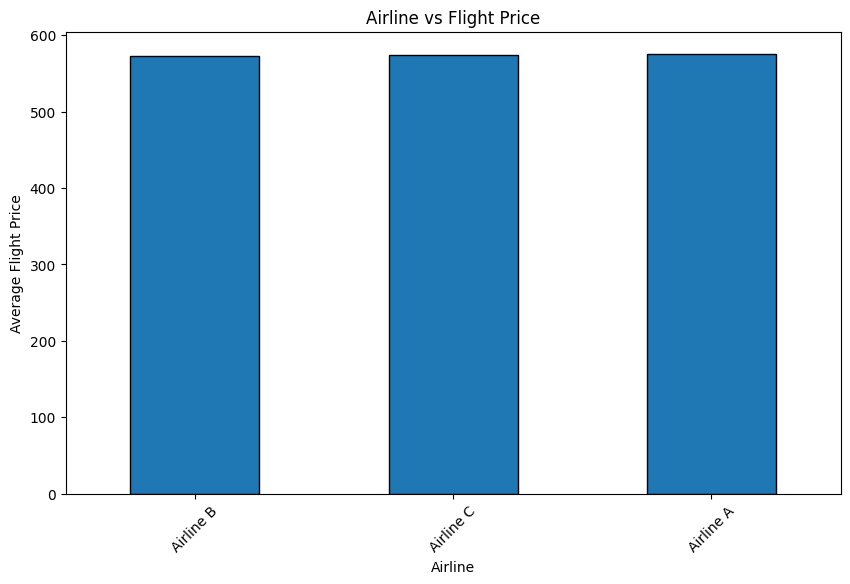

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Airline')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Airline vs Flight Price')
plt.xlabel('Airline')
plt.ylabel('Average Flight Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


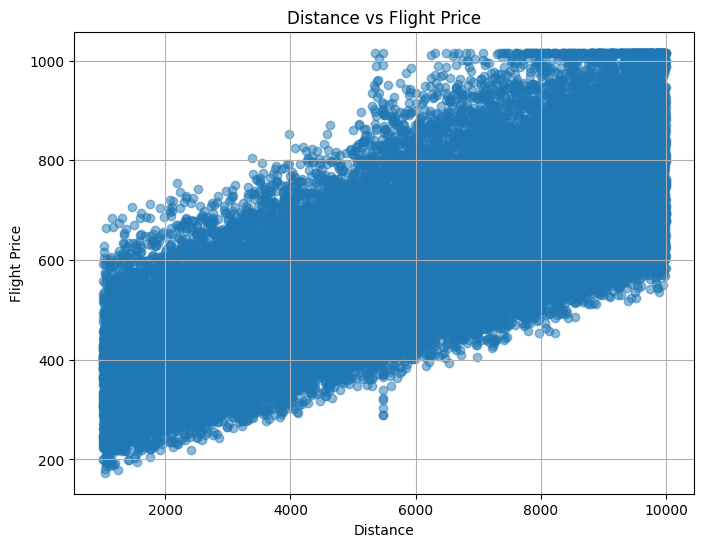

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Create a scatter plot of Distance vs. Flight Price
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(data['Distance'], data['Flight_Price'], alpha=0.5)
plt.title('Distance vs Flight Price')
plt.xlabel('Distance')
plt.ylabel('Flight Price')
plt.grid(True)
plt.show()


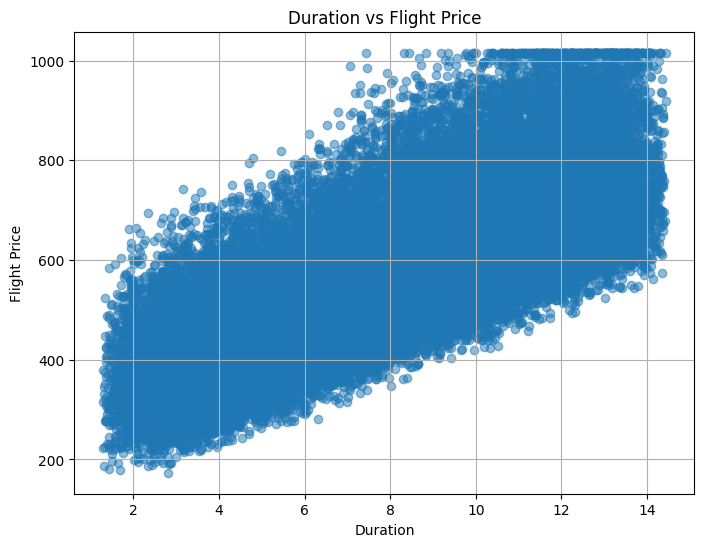

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Create a scatter plot of Distance vs. Flight Price
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(data['Duration'], data['Flight_Price'], alpha=0.5)
plt.title('Duration vs Flight Price')
plt.xlabel('Duration')
plt.ylabel('Flight Price')
plt.grid(True)
plt.show()


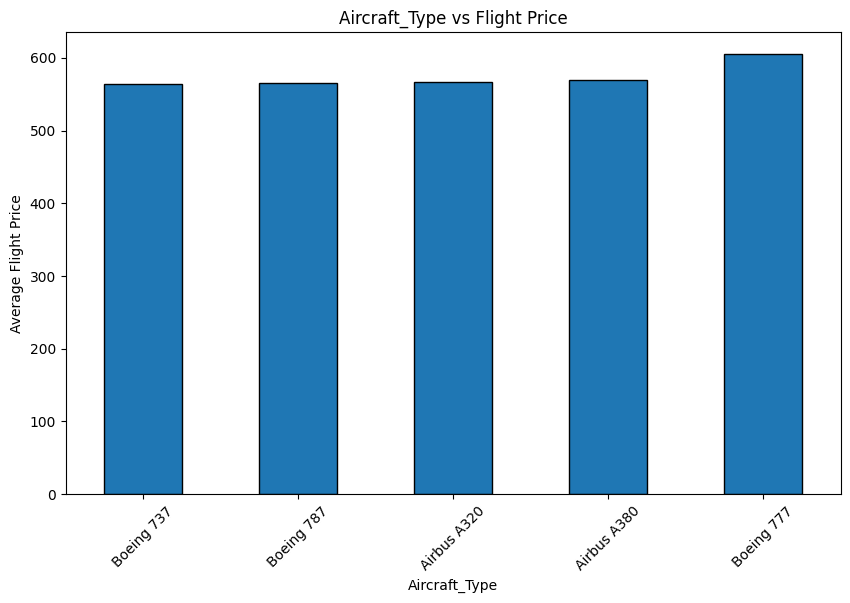

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Aircraft_Type')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Aircraft_Type vs Flight Price')
plt.xlabel('Aircraft_Type')
plt.ylabel('Average Flight Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


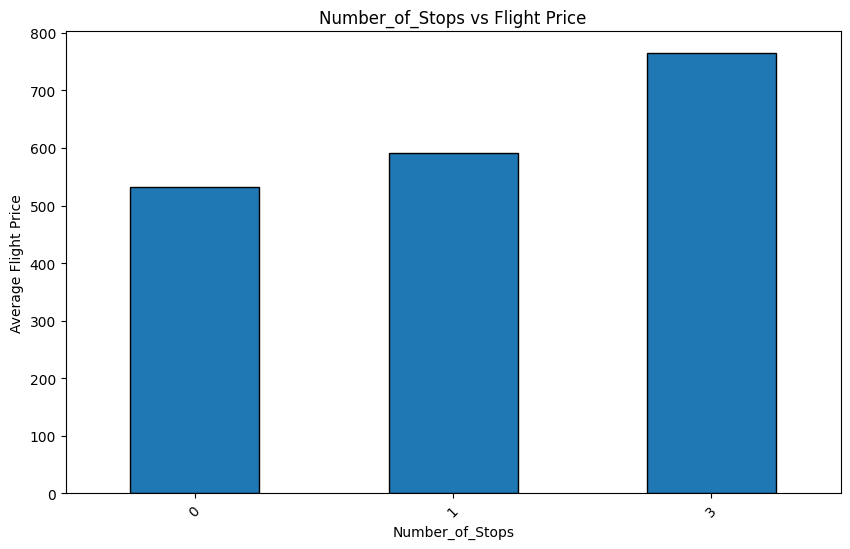

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Number_of_Stops')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Number_of_Stops vs Flight Price')
plt.xlabel('Number_of_Stops')
plt.ylabel('Average Flight Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


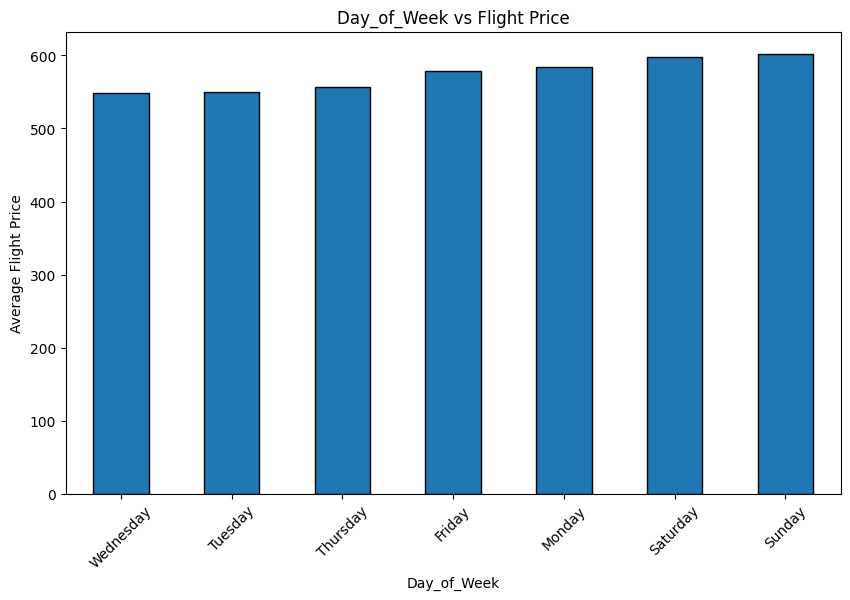

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Day_of_Week')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Day_of_Week vs Flight Price')
plt.xlabel('Day_of_Week')
plt.ylabel('Average Flight Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()
# Day_of_Week

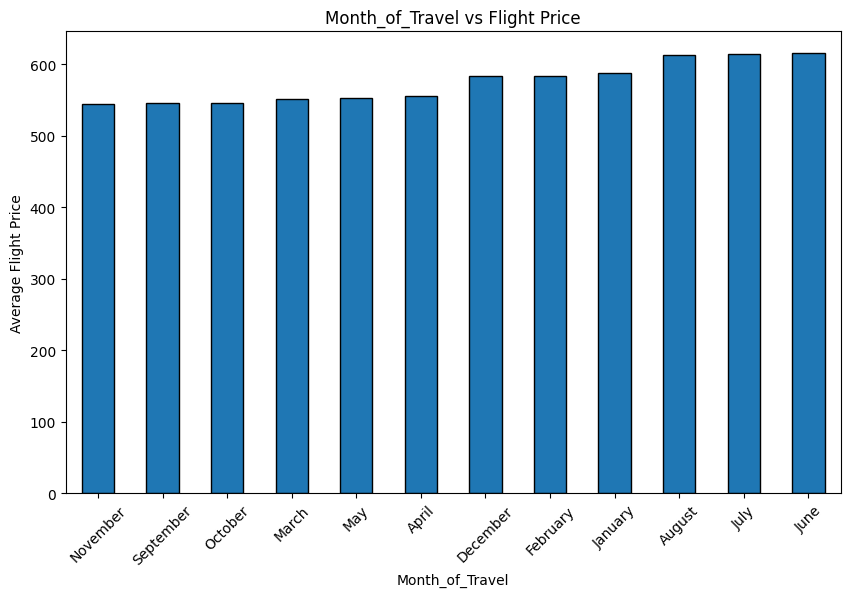

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Month_of_Travel')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Month_of_Travel vs Flight Price')
plt.xlabel('Month_of_Travel')
plt.ylabel('Average Flight Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()
# Day_of_Week

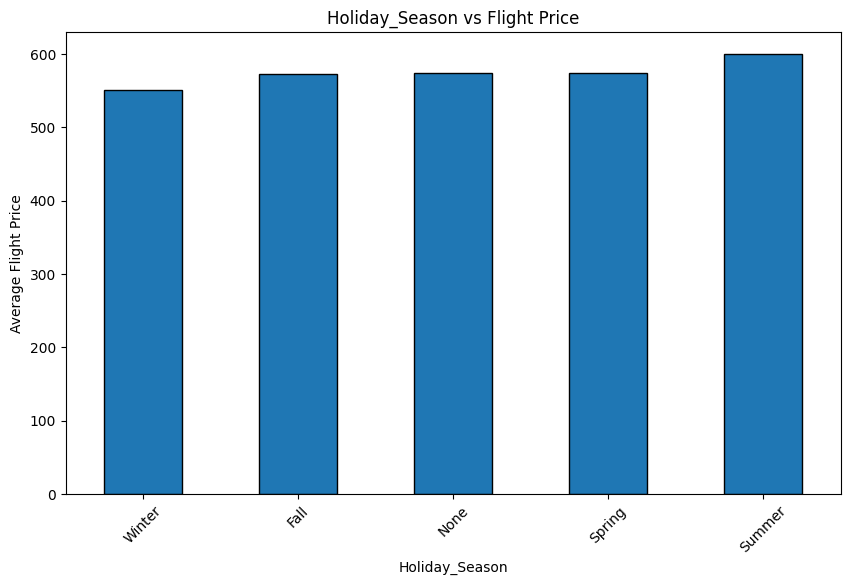

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Holiday_Season')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Holiday_Season vs Flight Price')
plt.xlabel('Holiday_Season')
plt.ylabel('Average Flight Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()
# Day_of_Week

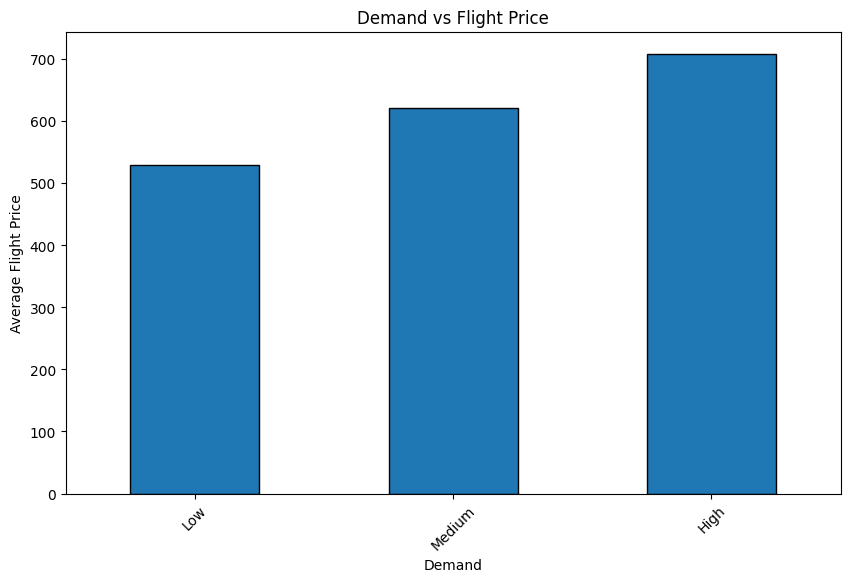

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Demand')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Demand vs Flight Price')
plt.xlabel('Demand')
plt.ylabel('Average Flight Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()
# Day_of_Week

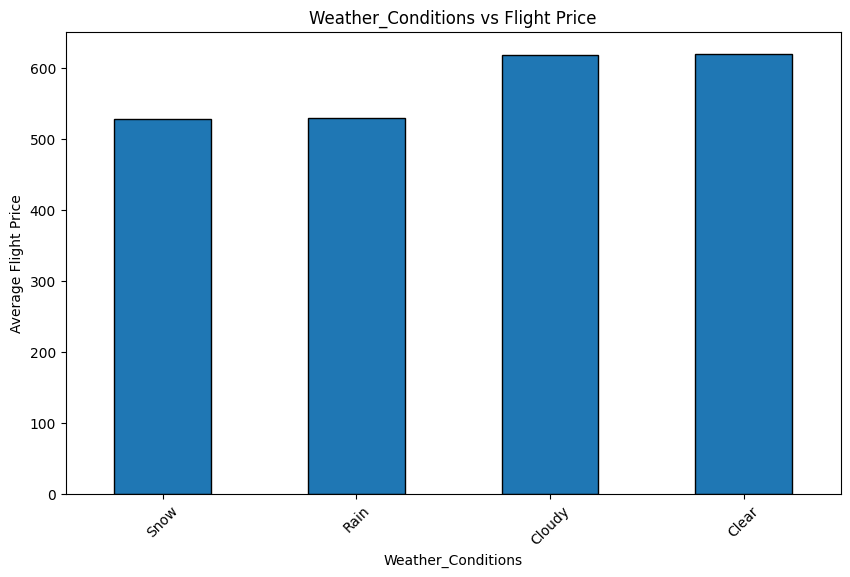

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Weather_Conditions')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Weather_Conditions vs Flight Price')
plt.xlabel('Weather_Conditions')
plt.ylabel('Average Flight Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()
# Day_of_Week

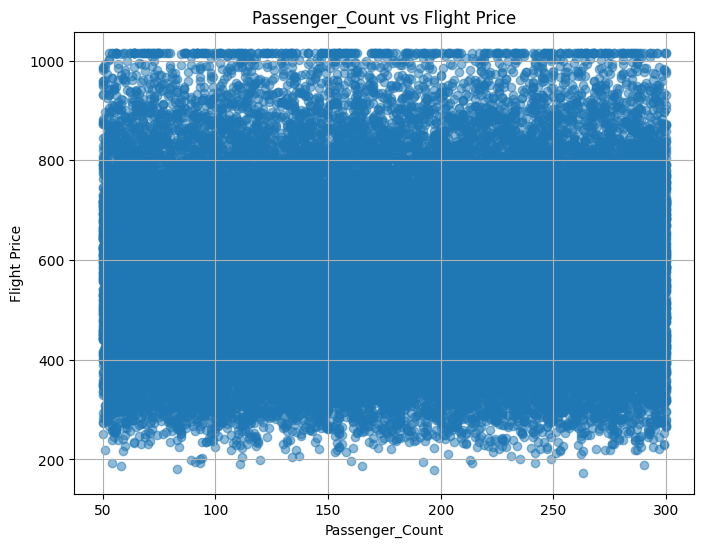

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Create a scatter plot of Distance vs. Flight Price
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(data['Passenger_Count'], data['Flight_Price'], alpha=0.5)
plt.title('Passenger_Count vs Flight Price')
plt.xlabel('Passenger_Count')
plt.ylabel('Flight Price')
plt.grid(True)
plt.show()


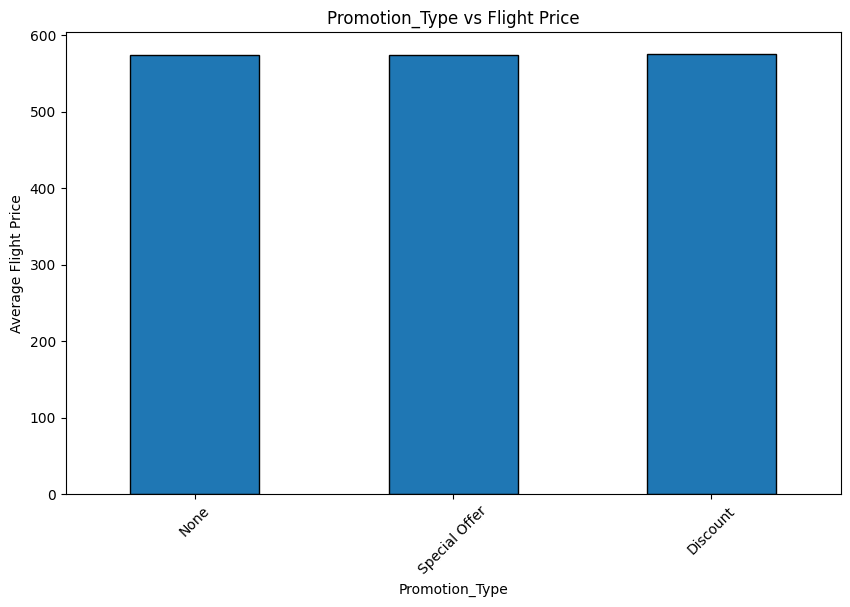

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = data.groupby('Promotion_Type')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Promotion_Type vs Flight Price')
plt.xlabel('Promotion_Type')
plt.ylabel('Average Flight Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


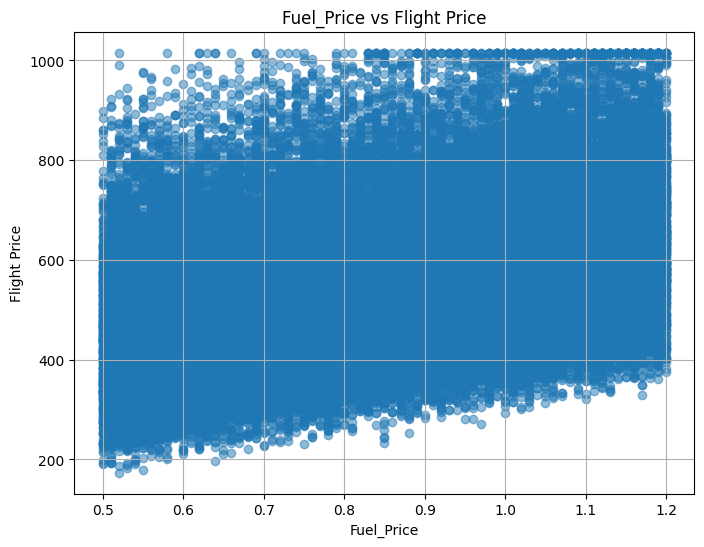

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Create a scatter plot of Distance vs. Flight Price
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(data['Fuel_Price'], data['Flight_Price'], alpha=0.5)
plt.title('Fuel_Price vs Flight Price')
plt.xlabel('Fuel_Price')
plt.ylabel('Flight Price')
plt.grid(True)
plt.show()


# Encoding 

In [78]:
data

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35
5,Airline B,Lake Steveville,East Patriciafurt,6254.0,8.43,Airbus A320,0,Tuesday,December,None,Low,Snow,267,None,1.15,596.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


In [79]:
from sklearn.preprocessing import LabelEncoder
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,6,7,2,1,Rain,107,1,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,3,11,3,0,Cloudy,131,2,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,3,3,0,1,Cloudy,170,0,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,4,4,1,1,Clear,181,1,1.09,804.35
5,Airline B,Lake Steveville,East Patriciafurt,6254.0,8.43,Airbus A320,0,5,2,1,1,Snow,267,1,1.15,596.86


In [80]:
# Define the columns to be encoded with one-hot encoding
categorical_cols = ['Airline', 'Aircraft_Type', 'Weather_Conditions']
# Apply one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [81]:
data

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Flight_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
1,Leonardland,New Stephen,2942.0,5.29,0,6,7,2,1,107,...,423.13,0,1,0,0,0,0,0,1,0
2,South Dylanville,Port Ambermouth,2468.0,4.41,1,3,11,3,0,131,...,442.17,1,0,0,0,0,1,1,0,0
3,Blakefort,Crosbyberg,3145.0,4.96,0,3,3,0,1,170,...,394.42,0,0,0,0,0,1,1,0,0
4,Michaelport,Onealborough,5558.0,8.09,1,4,4,1,1,181,...,804.35,1,0,0,1,0,0,0,0,0
5,Lake Steveville,East Patriciafurt,6254.0,8.43,0,5,2,1,1,267,...,596.86,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Port Donaldland,Maryshire,3884.0,5.70,1,3,8,0,1,263,...,417.18,1,0,0,0,0,1,0,0,0
44996,East Patriciafurt,East Vickiberg,9191.0,12.97,1,0,2,0,1,168,...,687.03,0,0,0,0,0,0,0,0,1
44997,Monicaton,West Johnburgh,6757.0,8.81,1,6,10,0,1,244,...,547.39,0,1,0,0,1,0,0,0,1
44998,Turnerburgh,Gabrielville,3587.0,6.21,0,2,6,1,2,121,...,487.67,1,0,0,1,0,0,1,0,0


In [82]:
from sklearn.preprocessing import LabelEncoder
# Define the columns to be encoded with label encoding
ordinal_colss = ['Departure_City', 'Arrival_City']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for cols in ordinal_colss:
    data[cols] = label_encoder.fit_transform(data[cols])

data.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Flight_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
1,9522,12689,2942.0,5.29,0,6,7,2,1,107,...,423.13,0,1,0,0,0,0,0,1,0
2,18699,15316,2468.0,4.41,1,3,11,3,0,131,...,442.17,1,0,0,0,0,1,1,0,0
3,994,2414,3145.0,4.96,0,3,3,0,1,170,...,394.42,0,0,0,0,0,1,1,0,0
4,10493,14783,5558.0,8.09,1,4,4,1,1,181,...,804.35,1,0,0,1,0,0,0,0,0
5,9174,4333,6254.0,8.43,0,5,2,1,1,267,...,596.86,1,0,0,0,0,0,0,0,1


In [83]:
# # Perform leave-one-out encoding for card_type, card_number, and tid
# from category_encoders import LeaveOneOutEncoder

# looe_encoder = LeaveOneOutEncoder(cols=['Departure_City', 'Arrival_City'])
# data= looe_encoder.fit_transform(data,data['Flight_Price'])

In [84]:
pd.set_option('display.max_columns', 500)

In [85]:
data

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
1,9522,12689,2942.0,5.29,0,6,7,2,1,107,1,1.08,423.13,0,1,0,0,0,0,0,1,0
2,18699,15316,2468.0,4.41,1,3,11,3,0,131,2,0.52,442.17,1,0,0,0,0,1,1,0,0
3,994,2414,3145.0,4.96,0,3,3,0,1,170,0,0.71,394.42,0,0,0,0,0,1,1,0,0
4,10493,14783,5558.0,8.09,1,4,4,1,1,181,1,1.09,804.35,1,0,0,1,0,0,0,0,0
5,9174,4333,6254.0,8.43,0,5,2,1,1,267,1,1.15,596.86,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,15638,10229,3884.0,5.70,1,3,8,0,1,263,0,0.69,417.18,1,0,0,0,0,1,0,0,0
44996,4312,4715,9191.0,12.97,1,0,2,0,1,168,0,0.74,687.03,0,0,0,0,0,0,0,0,1
44997,10660,22113,6757.0,8.81,1,6,10,0,1,244,2,0.83,547.39,0,1,0,0,1,0,0,0,1
44998,20553,5379,3587.0,6.21,0,2,6,1,2,121,2,0.60,487.67,1,0,0,1,0,0,1,0,0


# Spliting

In [86]:
X= data.drop('Flight_Price',axis=1)
y = data['Flight_Price']

In [87]:
y

1        423.13
2        442.17
3        394.42
4        804.35
5        596.86
          ...  
44995    417.18
44996    687.03
44997    547.39
44998    487.67
44999    532.92
Name: Flight_Price, Length: 44476, dtype: float64

In [88]:
X.shape

(44476, 21)

In [89]:
y.shape

(44476,)

# Scaling 

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)
X
# scaler

array([[-0.30026547,  0.15008189, -0.98083303, ..., -0.59199535,
         1.74745271, -0.57444247],
       [ 1.07742605,  0.53991782, -1.16374526, ...,  1.68920246,
        -0.57226155, -0.57444247],
       [-1.58052626, -1.37468562, -0.9024972 , ...,  1.68920246,
        -0.57226155, -0.57444247],
       ...,
       [-0.12942391,  1.54856451,  0.49134029, ..., -0.59199535,
        -0.57226155,  1.74081836],
       [ 1.35575667, -0.93469188, -0.73193348, ...,  1.68920246,
        -0.57226155, -0.57444247],
       [-0.83801103, -1.44636082, -0.22911779, ..., -0.59199535,
         1.74745271, -0.57444247]])

# Train and Test

In [91]:
from sklearn.model_selection import train_test_split
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Model

In [92]:
# Import necessary libraries
import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset and split it into features (X) and the target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 289.3607647006592
R-squared (R2) Score: 0.9886350920079349


In [ ]:
learning rate will take comes under (0-1)

In [93]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.7901783694262992
Learning rate :  0.05 cross_val_score: 0.98797563475169
Learning rate :  0.08 cross_val_score: 0.9909376873754318
Learning rate :  0.1 cross_val_score: 0.9911050947751527
Learning rate :  0.2 cross_val_score: 0.9905106213937855
Learning rate :  0.25 cross_val_score: 0.9899842483552077
Learning rate :  0.3 cross_val_score: 0.989581628081259


In [94]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
xgb_regressor= xgb.XGBRegressor(learning_rate =0.1,n_estimators=100)
xgb_regressor.fit(X_train,y_train)
print("Learning rate : ",0.1,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.1 cross_val_score: 0.9911050947751527


In [95]:
cross_val_xgb_regressor=max(cross_val_xgb)
print("The best Learning rate is 0.1 and Cross_val_score is:",cross_val_xgb_regressor)


The best Learning rate is 0.1 and Cross_val_score is: 0.9911050947751527


In [96]:
# Make predictions
y_pred = xgb_regressor.predict(X_test)

In [97]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 252.80189599381308
R-squared (R2) Score: 0.9900709749258457


In [98]:
xgb_regressor.feature_importances_

array([3.0515881e-04, 2.1581489e-04, 3.3754408e-01, 2.3432320e-01,
       6.7898087e-02, 1.9824132e-02, 2.2134339e-02, 1.5382723e-04,
       2.0481843e-01, 3.4101654e-04, 1.6522009e-04, 1.0928488e-01,
       1.0571947e-04, 9.1864727e-05, 1.2361673e-04, 1.6837697e-04,
       1.7500266e-04, 2.4689815e-04, 6.7926478e-04, 6.7866774e-04,
       7.2245410e-04], dtype=float32)

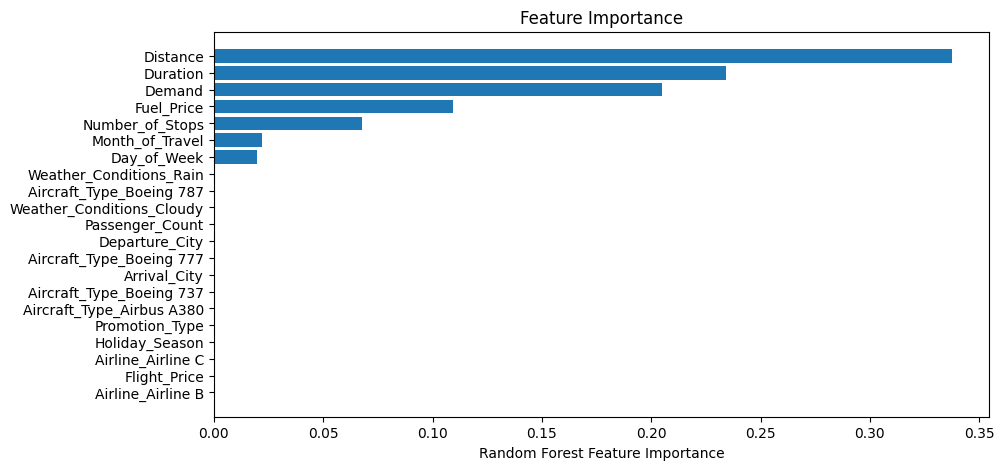

In [99]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [100]:
b=pd.read_csv('test.csv')
b

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,F45001,Airline B,Davidstad,Moorebury,3096.0,18:43,0:14,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,None,0.95
1,F45002,Airline A,Lake Tyler,Camachoberg,8760.0,1:16,13:04,11.80,Airbus A380,1,Thursday,April,None,High,Clear,295,Discount,1.05
2,F45003,Airline C,New Carol,West Ryanfurt,6365.0,12:17,21:52,9.59,Boeing 777,1,Sunday,January,None,Low,Rain,223,Discount,0.63
3,F45004,Airline A,Richardsonshire,Jordanburgh,7836.0,0:11,10:23,10.21,Airbus A380,0,Thursday,March,None,Low,Rain,223,None,0.88
4,F45005,Airline B,Tiffanytown,Morganstad,1129.0,3:22,5:13,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,F49996,Airline B,Port Kristin,Jeffreyhaven,9389.0,22:41,11:02,12.35,Boeing 777,1,Tuesday,March,None,High,Cloudy,143,Special Offer,0.51
4996,F49997,NaN,NaN,Lake Christopherville,7718.0,11:20,22:53,11.55,Airbus A320,1,Friday,September,Spring,Low,Rain,55,Special Offer,0.50
4997,F49998,Airline C,Port Richard,Callahanmouth,2597.0,16:26,21:21,4.93,Airbus A380,1,Friday,September,Fall,Low,Snow,145,Discount,0.55
4998,F49999,Airline B,Perrymouth,South Zachary,4659.0,6:13,13:55,7.71,Airbus A380,1,Friday,August,Fall,High,Cloudy,163,Special Offer,0.79


In [101]:
data1=b.copy()
data1


,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,F45001,Airline B,Davidstad,Moorebury,3096.0,18:43,0:14,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,None,0.95
1,F45002,Airline A,Lake Tyler,Camachoberg,8760.0,1:16,13:04,11.80,Airbus A380,1,Thursday,April,None,High,Clear,295,Discount,1.05
2,F45003,Airline C,New Carol,West Ryanfurt,6365.0,12:17,21:52,9.59,Boeing 777,1,Sunday,January,None,Low,Rain,223,Discount,0.63
3,F45004,Airline A,Richardsonshire,Jordanburgh,7836.0,0:11,10:23,10.21,Airbus A380,0,Thursday,March,None,Low,Rain,223,None,0.88
4,F45005,Airline B,Tiffanytown,Morganstad,1129.0,3:22,5:13,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,F49996,Airline B,Port Kristin,Jeffreyhaven,9389.0,22:41,11:02,12.35,Boeing 777,1,Tuesday,March,None,High,Cloudy,143,Special Offer,0.51
4996,F49997,NaN,NaN,Lake Christopherville,7718.0,11:20,22:53,11.55,Airbus A320,1,Friday,September,Spring,Low,Rain,55,Special Offer,0.50
4997,F49998,Airline C,Port Richard,Callahanmouth,2597.0,16:26,21:21,4.93,Airbus A380,1,Friday,September,Fall,Low,Snow,145,Discount,0.55
4998,F49999,Airline B,Perrymouth,South Zachary,4659.0,6:13,13:55,7.71,Airbus A380,1,Friday,August,Fall,High,Cloudy,163,Special Offer,0.79


In [102]:
duplicates = data1[data1.duplicated()]
duplicates

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price


In [103]:
data1.isnull().sum()

Flight_ID               0
Airline               427
Departure_City         39
Arrival_City           30
Distance                9
Departure_Time          0
Arrival_Time            0
Duration                0
Aircraft_Type           8
Number_of_Stops         0
Day_of_Week            25
Month_of_Travel        34
Holiday_Season          0
Demand                 34
Weather_Conditions     49
Passenger_Count         0
Promotion_Type         49
Fuel_Price             10
dtype: int64

In [104]:
percent_missing = data1.isnull().sum() * 100 / len(data1)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
Airline,8.54
Promotion_Type,0.98
Weather_Conditions,0.98
Departure_City,0.78
Demand,0.68
Month_of_Travel,0.68
Arrival_City,0.60
Day_of_Week,0.50
Fuel_Price,0.20
Distance,0.18


In [105]:
data1['Airline'].fillna(data1['Airline'].mode()[0], inplace=True)


In [106]:
data1['Aircraft_Type'].fillna(data1['Aircraft_Type'].mode()[0], inplace=True)


In [107]:
data1['Distance'].fillna(data1['Distance'].median(),inplace=True)

In [108]:
data1['Day_of_Week'].fillna(data1['Day_of_Week'].mode()[0], inplace=True)


In [109]:
data1['Month_of_Travel'].fillna(data1['Month_of_Travel'].mode()[0], inplace=True)


In [110]:
data1['Demand'].fillna(data1['Demand'].mode()[0], inplace=True)


In [111]:
data1['Promotion_Type'].fillna(data1['Promotion_Type'].mode()[0], inplace=True)


In [112]:
data1['Weather_Conditions'].fillna(data1['Weather_Conditions'].mode()[0], inplace=True)


In [113]:
data1['Fuel_Price'].fillna(data1['Fuel_Price'].median(),inplace=True)

In [114]:
data1['Departure_City'].fillna(data1['Departure_City'].mode()[0], inplace=True)


In [115]:
data1['Arrival_City'].fillna(data1['Arrival_City'].mode()[0], inplace=True)


In [116]:

# Assuming you have your data in a DataFrame called 'df'
data1.drop(['Flight_ID', 'Departure_Time', 'Arrival_Time'], axis=1, inplace=True)

# Now, your DataFrame 'df' will no longer contain the 'Flight_ID', 'Departure_Time', and 'Arrival_Time' columns.


In [117]:
data1.dtypes

Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
dtype: object

In [118]:
data1.isnull().sum()

Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
dtype: int64

In [119]:
from sklearn.preprocessing import LabelEncoder
# Define the columns to be encoded with label encoding
ordinal_colsss = ['Departure_City', 'Arrival_City']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for colss in ordinal_colsss:
    data1[colss] = label_encoder.fit_transform(data1[colss])

data1.head()

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,Airline B,490,2072,3096.0,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,None,0.95
1,Airline A,1795,302,8760.0,11.80,Airbus A380,1,Thursday,April,None,High,Clear,295,Discount,1.05
2,Airline C,2180,4147,6365.0,9.59,Boeing 777,1,Sunday,January,None,Low,Rain,223,Discount,0.63
3,Airline A,3201,1364,7836.0,10.21,Airbus A380,0,Thursday,March,None,Low,Rain,223,None,0.88
4,Airline B,3791,2083,1129.0,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11


In [120]:
# Define the columns to be encoded with one-hot encoding
categorical_cols = ['Airline', 'Aircraft_Type', 'Weather_Conditions']
# Apply one-hot encoding
data1 = pd.get_dummies(data1, columns=categorical_cols, drop_first=True)

In [121]:
from sklearn.preprocessing import LabelEncoder
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    data1[col] = label_encoder.fit_transform(data1[col])

data1.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,490,2072,3096.0,5.52,1,2,1,3,2,110,1,0.95,1,0,0,1,0,0,0,0,0
1,1795,302,8760.0,11.80,1,4,0,1,0,295,0,1.05,0,0,1,0,0,0,0,0,0
2,2180,4147,6365.0,9.59,1,3,4,1,1,223,0,0.63,0,1,0,0,1,0,0,1,0
3,3201,1364,7836.0,10.21,0,4,7,1,1,223,1,0.88,0,0,1,0,0,0,0,1,0
4,3791,2083,1129.0,1.86,1,2,1,3,0,145,2,1.11,1,0,0,0,0,0,1,0,0


In [122]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
data1= xgb.DMatrix(data=data1, enable_categorical=True)

In [123]:
import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,
    'eta': 0.2,
    'objective': 'reg:squarederror',  # Specify the appropriate objective for your problem
}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # You can adjust the number of boosting rounds
    nfold=10,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=10,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(data1)



In [124]:
def custom_round(x):
    round_value=round(x*100)
    return round_value/100


In [125]:
y_pred1=np.vectorize(custom_round)(y_pred)

In [126]:
len(y_pred1)

5000

In [127]:
submission = pd.read_csv("test.csv")

Predicted_flight_price=pd.DataFrame({'Flight_ID':submission['Flight_ID'],'Flight_Price':y_pred1})

In [128]:
Predicted_flight_price

,Flight_ID,Flight_Price
0,F45001,894.92
1,F45002,833.03
2,F45003,764.51
3,F45004,734.03
4,F45005,775.39
...,...,...
4995,F49996,748.05
4996,F49997,788.32
4997,F49998,806.35
4998,F49999,817.17
